In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import corner

# Pour 1 paramètre

In [43]:
prefix = "data/0.05__add__"

chi2_df = pd.read_csv(prefix+"chi2.csv", header=None)
pars_df = pd.read_csv(prefix+"pars.csv", header=None)

As = pars_df[0].values
chi2 = chi2_df[0].values


# Tri
indices_tri_As = np.argsort(As)

chi2_tri_As = chi2[indices_tri_As]
As_tri_As = As[indices_tri_As]

%matplotlib widget

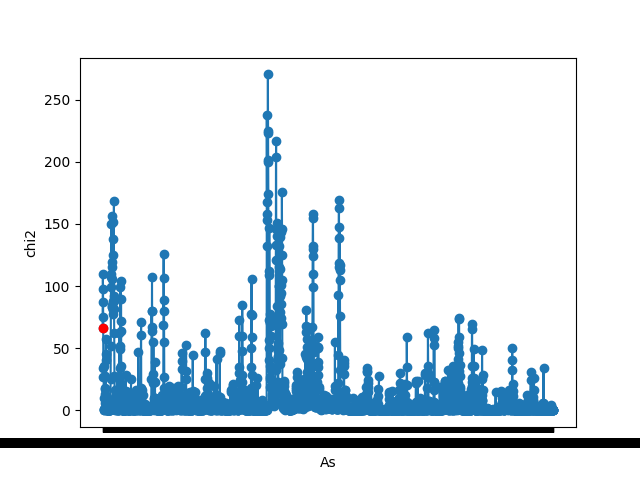

In [44]:
plt.figure()

plt.plot(As,chi2, 'o-')
plt.plot(As[0],chi2[0], 'ro')
plt.xlabel("As")
plt.ylabel("chi2")

plt.show()

# Pour 2 paramètres

In [45]:
prefix = "data/0.05__add__"
# prefix = "data/2024.09.11-14h30_"

chi2_df = pd.read_csv(prefix+"chi2.csv", header=None)
pars_df = pd.read_csv(prefix+"pars.csv", header=None, delimiter = " ")

Om = pars_df[0].values
As = pars_df[1].values
chi2 = chi2_df[0].values


# Tri
indices_tri_Om = np.argsort(Om)
indices_tri_As = np.argsort(As)

Om_tri_Om = Om[indices_tri_Om]
chi2_tri_Om = chi2[indices_tri_Om]

chi2_tri_As = chi2[indices_tri_As]
As_tri_As = As[indices_tri_As]

%matplotlib widget

## 1D

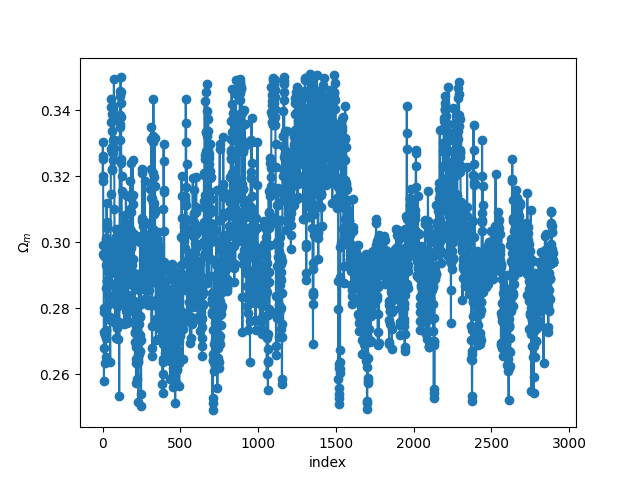

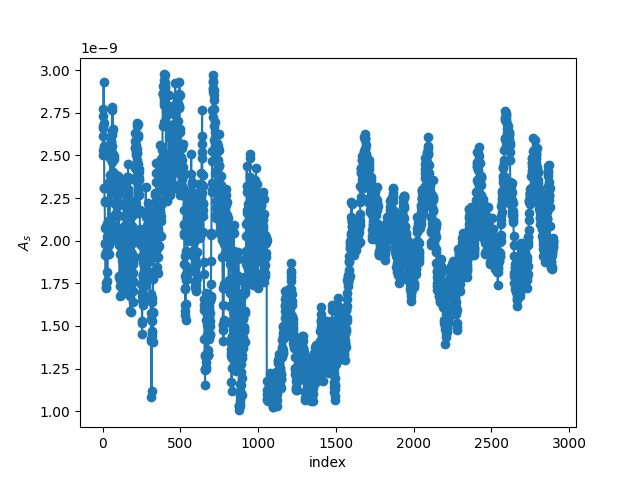

In [46]:
plt.figure()
plt.plot(Om, 'o-')
plt.xlabel("index")
plt.ylabel(r"$\Omega_m$")
plt.show()

plt.figure()
plt.plot(As, 'o-')
plt.xlabel("index")
plt.ylabel(r"$A_s$")
plt.show()

## 2D

### Sans tri

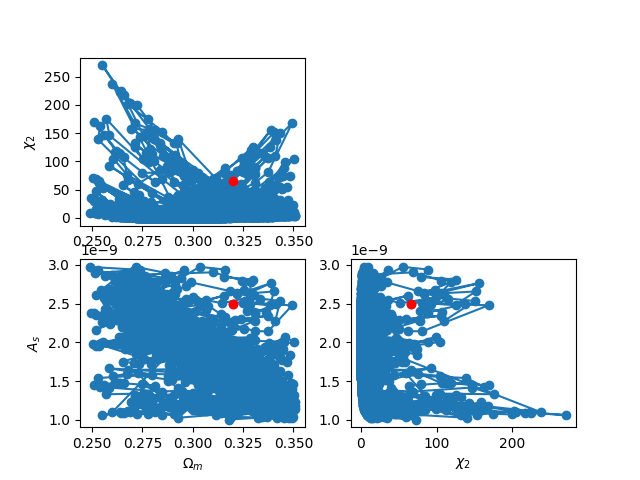

In [47]:
plt.figure()

plt.subplot(2, 2, 1)
plt.plot(Om,chi2, 'o-')
plt.plot(Om[0],chi2[0], 'ro')
plt.ylabel(r"$\chi_2$")

plt.subplot(2, 2, 3)
plt.plot(Om,As, 'o-')
plt.plot(Om[0],As[0], 'ro')
plt.xlabel(r"$\Omega_m$")
plt.ylabel(r"$A_s$")

plt.subplot(2, 2, 4)
plt.plot(chi2,As, 'o-')
plt.plot(chi2[0],As[0], 'ro')
plt.xlabel(r"$\chi_2$")

plt.show()

### Avec tri

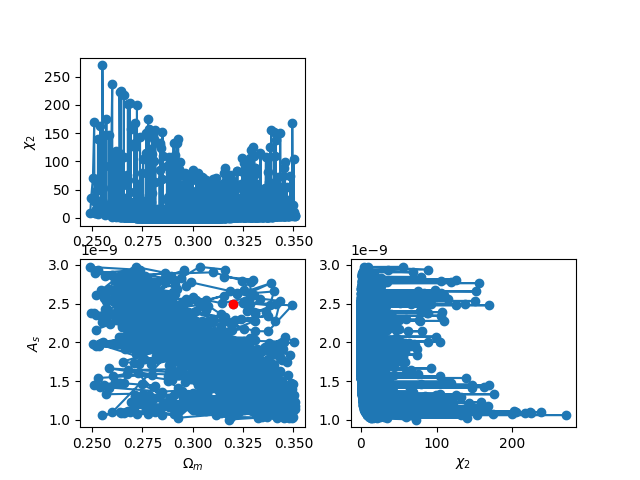

In [48]:
plt.figure()

plt.subplot(2, 2, 1)
plt.plot(Om_tri_Om,chi2_tri_Om, 'o-')
plt.ylabel(r"$\chi_2$")

plt.subplot(2, 2, 3)
plt.plot(Om,As, 'o-')
plt.plot(Om[0],As[0], 'ro')
plt.xlabel(r"$\Omega_m$")
plt.ylabel(r"$A_s$")

plt.subplot(2, 2, 4)
plt.plot(chi2_tri_As,As_tri_As, 'o-')
plt.xlabel(r"$\chi_2$")

plt.show()

### Nuage de points

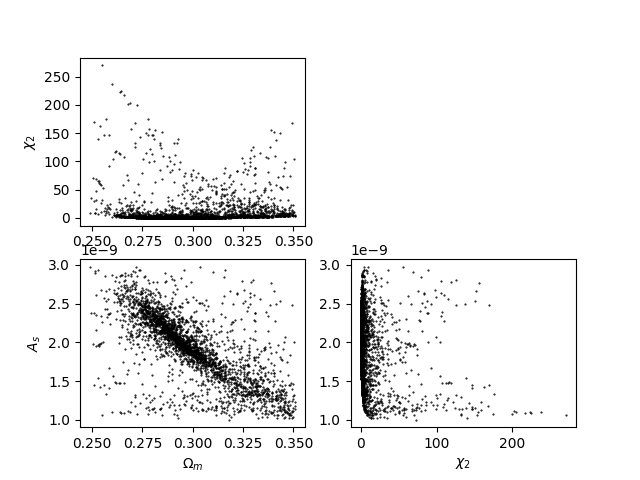

In [49]:
plt.figure()

plt.subplot(2, 2, 1)
plt.plot(Om,chi2, '.', color='black', markersize=1)
# plt.plot(Om[0],chi2[0], 'ro')
plt.ylabel(r"$\chi_2$")

plt.subplot(2, 2, 3)
plt.plot(Om, As, '.', color='black', markersize=1)
# plt.plot(Om[0],As[0], 'ro')
plt.xlabel(r"$\Omega_m$")
plt.ylabel(r"$A_s$")

plt.subplot(2, 2, 4)
plt.plot(chi2,As, '.', color='black', markersize=1)
# plt.plot(chi2[0],As[0], 'ro')
plt.xlabel(r"$\chi_2$")

plt.show()

## Corner

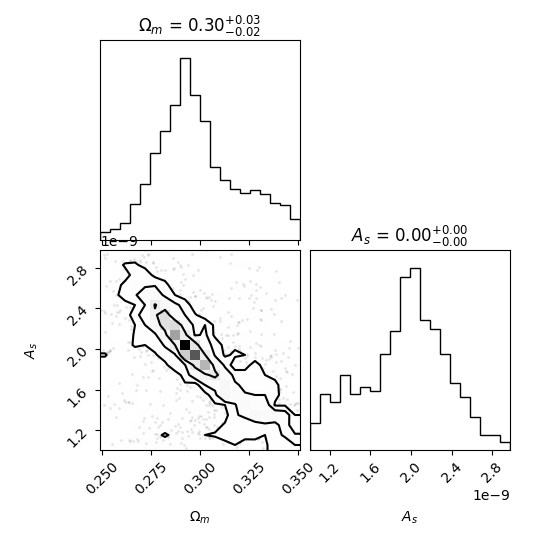

In [50]:
data = pars_df.values

figure = corner.corner(data, labels=[r"$\Omega_m$", r"$A_s$"], show_titles=True)

plt.show()

## Plot du Number count

In [51]:
from my_hmf import *

In [52]:
cosmo_params = {
    "H0": 70,
    "Om0": 0.294,
    "Ob0": 0.022 / 0.7**2,
    "ns": 0.965,
    "As": 2e-9
}

N_z = 5
zmax = 1


computedpars = ["Om0","As"]
Ncamb = 1000


thetai = np.array([0.32, 2.5e-9])
stepfactor = 0.05

In [53]:
s = Study(N_z,zmax, computedpars, knownpars = cosmo_params, Ncamb=Ncamb)
s.set_thetai(thetai)
s.set_stepfactor(stepfactor)

Om0, As = s.find_best_values()
print(Om0, As)

s.create_artificial_data(cosmo_params)
approximate_number_count = s.get_approximate_number_count()

0.29410407056680704 1.996979189300851e-09


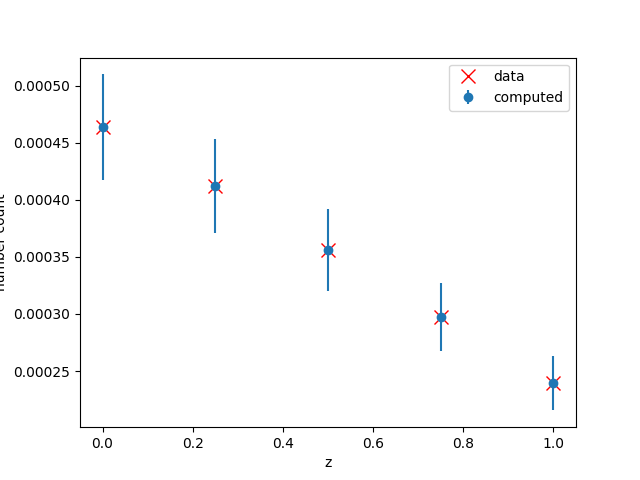

In [54]:
plt.figure()

plt.errorbar(s.z, s.data, yerr=s.std, fmt='o')
plt.plot(s.z, approximate_number_count, 'x', color='red', markersize=10)
plt.xlabel("z")
plt.ylabel("number count")
plt.legend(["data", "computed"])

plt.show()